In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
#  Import and read the flight data for 2018.

clean_flights_18_df = pd.read_csv("Data_files/REV3_2018_cleaned_delays.csv")
clean_flights_18_df.head()

,CRS_ELAPSED_TIME,DISTANCE,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,DEST_SNOW,DEST_SNWD,OP_CARRIER_AA,OP_CARRIER_DL,...,sched_dep_time_Night,sched_arr_time_Afternoon,sched_arr_time_Evening,sched_arr_time_Morning,sched_arr_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter,DELAY
0,-0.567662,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,0,0,...,0,0,0,0,1,0,0,0,1,0
1,-0.810652,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.719531,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,1,0,...,1,0,0,1,0,0,0,0,1,0
3,-0.506914,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,1,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.628409,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,1,0,...,0,0,1,0,0,0,0,0,1,1


In [ ]:
list(clean_flights_18_df.columns)

In [3]:
X = clean_flights_18_df.copy()
X.drop("DELAY", axis=1, inplace=True)
X.head()

,CRS_ELAPSED_TIME,DISTANCE,ORIGIN_PRCP,ORIGIN_SNOW,ORIGIN_SNWD,DEST_PRCP,DEST_SNOW,DEST_SNWD,OP_CARRIER_AA,OP_CARRIER_DL,...,sched_dep_time_Morning,sched_dep_time_Night,sched_arr_time_Afternoon,sched_arr_time_Evening,sched_arr_time_Morning,sched_arr_time_Night,season_Autumn,season_Spring,season_Summer,season_Winter
0,-0.567662,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.810652,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,0,0,...,1,0,0,0,1,0,0,0,0,1
2,-0.719531,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,1,0,...,0,1,0,0,1,0,0,0,0,1
3,-0.506914,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,1,0,...,1,0,0,0,1,0,0,0,0,1
4,-0.628409,-0.589053,-0.316961,-0.124601,1.461213,-0.316882,-0.125544,-0.134852,1,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
y = clean_flights_18_df["DELAY"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

In [5]:
# Ravel the target array y: 
y = y.ravel()
y[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
gbt = GradientBoostingClassifier()

In [8]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier()

In [9]:
y_pred = gbt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6759573533522342


In [ ]:
# Tuning the hyperparameters (first round).

In [10]:
# Set different hyperparameters to tune.
hyperparameters = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
}

In [11]:
# Use the grid search to identify the best hyperparameters.
grid_search = GridSearchCV(GradientBoostingClassifier(), hyperparameters, cv=5, refit=True, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True)

In [12]:
# Access the best hyperparameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [13]:
# Run a new GBT model with the best hyperparameters. 
gbt_tuned = GradientBoostingClassifier(learning_rate=best_params["learning_rate"],n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"])

In [14]:
gbt_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=300)

In [15]:
y_pred_tuned = gbt_tuned.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))

Accuracy: 0.696561913508765


In [ ]:
# Trying another one to see if we can do any better.

In [17]:
hyperparameters_2 = {
    "learning_rate": [0.08, 0.1, 0.12],
    "n_estimators": [250, 300, 350],
    "max_depth": [6, 7, 8],
}

In [18]:
grid_search_2 = GridSearchCV(GradientBoostingClassifier(), hyperparameters_2, cv=5, refit=True, return_train_score=True)
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.08, 0.1, 0.12],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [250, 300, 350]},
             return_train_score=True)

In [19]:
best_params_2 = grid_search_2.best_params_

In [20]:
print("Best parameters:", best_params_2)

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}


In [21]:
# Same as previous tuning session, so no need to run a new model with this tuning. 
# Run a new GBT tuned model with the best hyperparameters from this latest grid search. 
# gbt_tuned_2 = GradientBoostingClassifier(learning_rate=best_params_2["learning_rate"],n_estimators=best_params_2["n_estimators"], max_depth=best_params_2["max_depth"])

In [22]:
# gbt_tuned_2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=300)

In [23]:
# y_pred_tuned_2 = gbt_tuned_2.predict(X_test)

In [24]:
# print("Accuracy:", accuracy_score(y_test, y_pred_tuned_2))

Accuracy: 0.692928163558679


In [25]:
import pickle 

In [26]:
file_name = "Flights18_gbt_tuned.sav"
pickle.dump(gbt_tuned,open(file_name,'wb'))

In [27]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred_tuned)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred_tuned))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,13812,1939
Actual 1,5660,3632


Accuracy Score : 0.696561913508765
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.88      0.78     15751
           1       0.65      0.39      0.49      9292

    accuracy                           0.70     25043
   macro avg       0.68      0.63      0.64     25043
weighted avg       0.69      0.70      0.67     25043



In [29]:
 # Get the feature importance array
importances = gbt_tuned.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(gbt_tuned.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.16889745287164354, 'ORIGIN_PRCP'),
 (0.15551184482180697, 'CRS_ELAPSED_TIME'),
 (0.150931568796475, 'DEST_PRCP'),
 (0.03663698123273751, 'sched_arr_time_Evening'),
 (0.030955654164011075, 'season_Summer'),
 (0.029280226905304844, 'OP_CARRIER_AA'),
 (0.025534435987190674, 'sched_arr_time_Morning'),
 (0.025410011564126776, 'DISTANCE'),
 (0.022928547773998467, 'ORIGIN_SNOW'),
 (0.017678184476794975, 'season_Spring')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

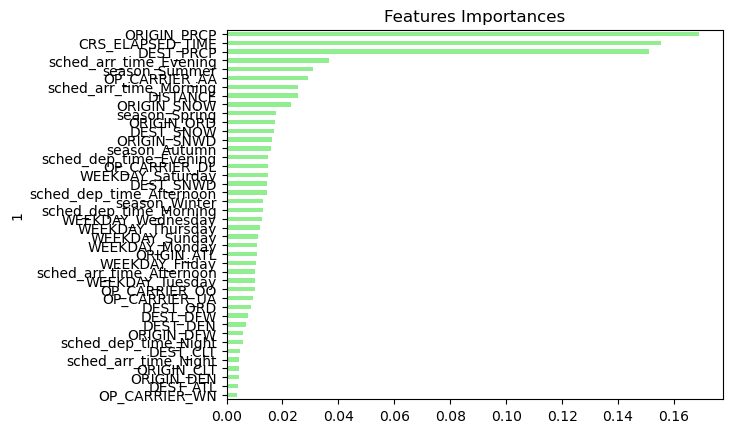

In [30]:
importances_df = pd.DataFrame(sorted(zip(gbt_tuned.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)